In [232]:
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import adam_v2
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)

# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly

In [233]:
train = pd.read_csv('train.csv')

In [234]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [235]:
train.shape

(159571, 8)

In [236]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [237]:
train = train.loc[(train['toxic'] == 1) | (train['severe_toxic'] == 1) | (train['obscene'] ==1) | (train['threat'] == 1) | (train['insult'] == 1) | (train['identity_hate'] ==1)]

train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


In [238]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000
mean,0.942619,0.098305,0.520740,0.029461,0.485485,0.086595
std,0.232576,0.297736,0.499585,0.169099,0.499805,0.281249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [239]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in train['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

train['comment_text'] = totalContentCleaned

In [240]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [241]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in df_test['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

df_test['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then youll ...
1,0000247867823ef7,From RfC \n\n The title is fine as it is IMO
2,00013b17ad220c46,\n\n Sources \n\n Zawe Ashton on Lapland —...
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I dont anonymously edit articles at all
5,0001ea8717f6de06,Thank you for understanding I think very highl...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia Such e...
7,000247e83dcc1211,Dear god this site is horrible
8,00025358d4737918,\n Only a fool can believe in such numbers \n...
9,00026d1092fe71cc,Double Redirects \n\n When fixing double red...


In [242]:
df_test_labels = pd.read_csv('test_labels.csv')
df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [243]:
test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


In [244]:
test = pd.merge(test_labels, df_test, on='id', how='inner')
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding I think very highl...
1,000247e83dcc1211,0,0,0,0,0,0,Dear god this site is horrible
2,0002f87b16116a7f,0,0,0,0,0,0,Somebody will invariably try to add Religion ...
3,0003e1cccfd5a40a,0,0,0,0,0,0,\n\n It says it right there that it IS a type...
4,00059ace3e3e9a53,0,0,0,0,0,0,\n\n Before adding a new product to the list...
5,000663aff0fffc80,0,0,0,0,0,0,this other one from 1897
6,000689dd34e20979,0,0,0,0,0,0,Reason for banning throwing \n\n This articl...
7,000844b52dee5f3f,0,0,0,0,0,0,blocked from editing Wikipedia
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
9,000968ce11f5ee34,0,0,0,0,0,0,Please stop If you continue to vandalize Wikip...


In [245]:
test = test.loc[(test['toxic'] == 1) | (test['severe_toxic'] == 1) | (test['obscene'] ==1) | (test['threat'] == 1) | (test['insult'] == 1) | (test['identity_hate'] ==1)]

test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
24,0013fed3aeae76b7,1,0,1,0,1,1,DJ Robinson is gay as hell he sucks his dick s...
29,0017d4d47894af05,1,0,1,0,1,0,Fuck off you antisemitic cunt
38,001d739c97bc2ae4,1,0,0,0,0,0,How dare you vandalize that page about the HMS...
40,001eff4007dbb65b,1,0,1,0,1,0,No he is an arrogant self serving immature idi...
89,005f47397e07e12f,1,0,0,0,0,0,Eek but shes cute in an earthy kind of way Can...
106,0071940212267fea,1,0,1,0,0,0,Well it sucks to have a university to be nickn...
107,0072b9c3697ab8cc,1,0,1,0,1,0,Argh \n\n Some random idiot deleted the whol...
124,0081b14d79f54b31,1,0,1,1,0,0,we hate america and we are going to bomb the s...
125,00842d1024b19972,1,0,1,0,1,0,Bold textYOU SUCK \n\n \n\n U SUCK HANNAH M...


In [246]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000,16225.000000
mean,0.942619,0.098305,0.520740,0.029461,0.485485,0.086595
std,0.232576,0.297736,0.499585,0.169099,0.499805,0.281249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (16225, 8)
Test data shape (6243, 8)


In [248]:
 #check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values in train data.')
print('The dataset has', test.isna().sum().sum(), 'missing values in test data.')

# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates in train data.')
print('The dataset has', test.duplicated().sum(), 'duplicates in test data.')

The dataset has 0 missing values in train data.
The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.
The dataset has 0 duplicates in test data.


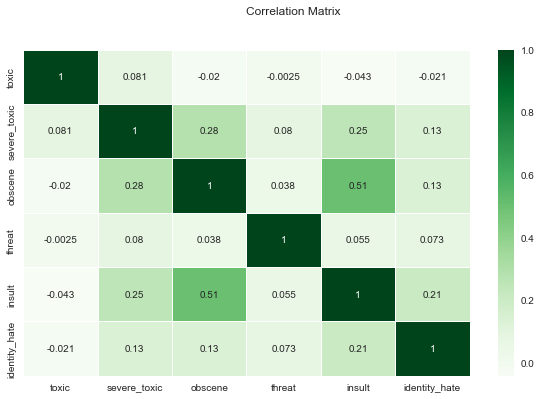

In [249]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

In [250]:
X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [251]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 100 #embedding vector output dimension 
num_epochs = 10 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [252]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (16225, 200)
X_test shape:  (6243, 200)


In [253]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [254]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

LSTM with Glove

In [255]:
glove_file = open('glove.6B.100d.txt', encoding="utf8")
embeddings_index = dict()
for line in glove_file:
    val = line.split(' ')
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    embeddings_index[word] = coefs
glove_file.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [256]:
# create a weight matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [257]:
LSTM_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.01), metrics=['accuracy'])

In [258]:
LSTM_Glove_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 200, 100)          4041700   
                                                                 
 spatial_dropout1d_12 (Spati  (None, 200, 100)         0         
 alDropout1D)                                                    
                                                                 
 lstm_7 (LSTM)               (None, 200, 25)           12600     
                                                                 
 batch_normalization_12 (Bat  (None, 200, 25)          100       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 200, 25)           0         
                                                                 
 global_max_pooling1d_12 (Gl  (None, 25)             

In [259]:
LSTM_Glove_model_fit = LSTM_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/10
58/58 [==============================] - 51s 723ms/step - loss: 0.4058 - accuracy: 0.9182 - val_loss: 0.4863 - val_accuracy: 0.9476
Epoch 2/10
58/58 [==============================] - 42s 729ms/step - loss: 0.3396 - accuracy: 0.9419 - val_loss: 0.4563 - val_accuracy: 0.9476
Epoch 3/10
58/58 [==============================] - 45s 783ms/step - loss: 0.3282 - accuracy: 0.9421 - val_loss: 0.4268 - val_accuracy: 0.9476
Epoch 4/10
58/58 [==============================] - 54s 929ms/step - loss: 0.3235 - accuracy: 0.9406 - val_loss: 0.4044 - val_accuracy: 0.9476
Epoch 5/10
58/58 [==============================] - 47s 803ms/step - loss: 0.3226 - accuracy: 0.9399 - val_loss: 0.3661 - val_accuracy: 0.9476
Epoch 6/10
58/58 [==============================] - 46s 783ms/step - loss: 0.3190 - accuracy: 0.9383 - val_loss: 0.3656 - val_accuracy: 0.9476
Epoch 7/10
58/58 [==============================] - 47s 816ms/step - loss: 0.3142 - accuracy: 0.9420 - val_loss: 0.3530 - val_accuracy: 0.9476

In [260]:
#train
LSTM_Glove_train_score = LSTM_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_Glove_train_score[0])
print('Train Accuracy:', LSTM_Glove_train_score[1])

#test
LSTM_Glove_test_score = LSTM_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_Glove_test_score[0])
print('Test Accuracy:', LSTM_Glove_test_score[1])

58/58 [==============================] - 20s 342ms/step - loss: 0.3335 - accuracy: 0.9421
Train Loss: 0.33351120352745056
Train Accuracy: 0.9420627355575562
25/25 [==============================] - 8s 305ms/step - loss: 0.3383 - accuracy: 0.9755
Test Loss: 0.338329017162323
Test Accuracy: 0.975492537021637


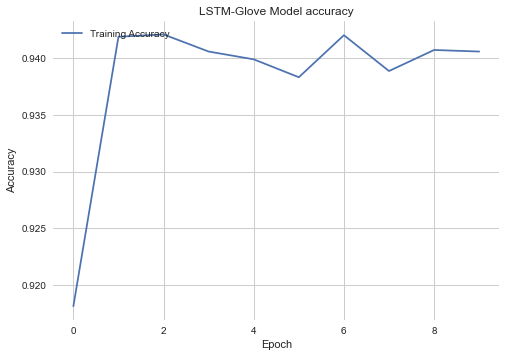

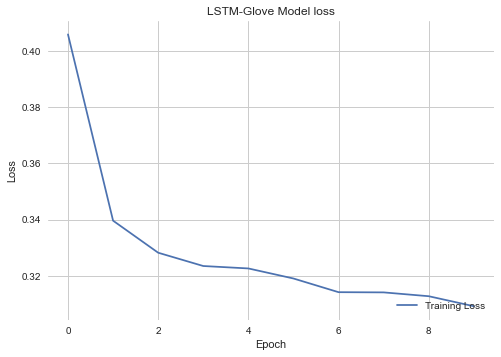

In [262]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_Glove_model_fit.history['accuracy'])
plt.title('LSTM-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Glove_model_fit.history['loss'])
plt.title('LSTM-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='lower right')
plt.show()